In [1]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model bulding
# 5.Evaluation 
# 6.Improvement

In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2039,ham,ÌÏ dun wan to watch infernal affair?,NaN,NaN,NaN
633,ham,Me n him so funny...,NaN,NaN,NaN
4251,ham,"How about clothes, jewelry, and trips?",NaN,NaN,NaN
2273,ham,Is that on the telly? No its Brdget Jones!,NaN,NaN,NaN
821,spam,25p 4 alfie Moon's Children in need song on ur...,NaN,NaN,NaN


In [5]:
df.shape

(5570, 5)

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
760,spam,Urgent Ur å£500 guaranteed award is still uncl...
991,ham,The Xmas story is peace.. The Xmas msg is love...
5541,ham,U still havent got urself a jacket ah?
4918,ham,Its so common hearin How r u? Wat r u doing? H...
1315,spam,Win the newest ÛÏHarry Potter and the Order o...


In [9]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
1173,ham,Horrible u eat macs eat until u forgot abt me ...
5416,ham,So how are you really. What are you up to. How...
1471,ham,"Will do, you gonna be at blake's all night? I ..."
2393,ham,"Babe, I'm back ... Come back to me ..."
325,ham,No calls..messages..missed calls


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
encoder.fit_transform(df['target']) #spam=1,ham=0

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
df['target'] = encoder.fit_transform(df['target']) 

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values and duplicate values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5167, 2)

## 2.EDA (Exploratory Data Analysis)

In [18]:
df['target'].value_counts()

0    4514
1     653
Name: target, dtype: int64

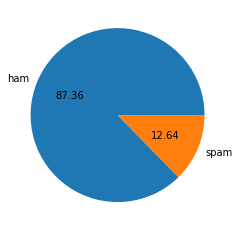

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
#Data is imbalanced

In [21]:
import nltk
# nltk.download('punkt')

In [22]:
df['text'].apply(len) #num of characters in every row

0       111
1        29
2       155
3        49
4        61
       ... 
5565    161
5566     37
5567     57
5568    125
5569     26
Name: text, Length: 5167, dtype: int64

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words 
df['text'].apply(lambda x:nltk.word_tokenize(x))
# df['text'].apply(lambda x:x.split())  ##there is some differance between split and nltk.word_tokenize(x)

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5565    [This, is, the, 2nd, time, we, have, tried, 2,...
5566     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5567    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5568    [The, guy, did, some, bitching, but, I, acted,...
5569                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5167, dtype: object

In [26]:
# df['text'].apply(lambda x:[len(i) for i in x.split()])

In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# df['text'].apply(lambda x:len(x.split())) ##there is some differance between split and nltk.word_tokenize(x)

0       24
1        8
2       37
3       13
4       15
        ..
5565    35
5566     9
5567    15
5568    27
5569     7
Name: text, Length: 5167, dtype: int64

In [28]:
# df['text'].apply(lambda x:nltk.word_tokenize(x))[0]

In [29]:
# df['text'].apply(lambda x:x.split())[0]  

In [30]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
#ham rows
df[df['target']==0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5563,0,Huh y lei...,12,4,1
5566,0,Will Ì_ b going to esplanade fr home?,37,9,1
5567,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5568,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
# for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4514.000000,4514.000000,4514.000000
mean,70.480062,17.126052,1.799956
std,56.362012,13.494492,1.278637
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

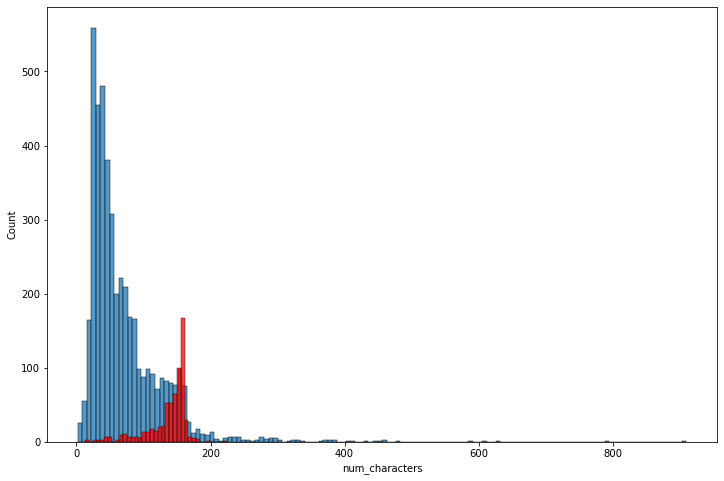

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

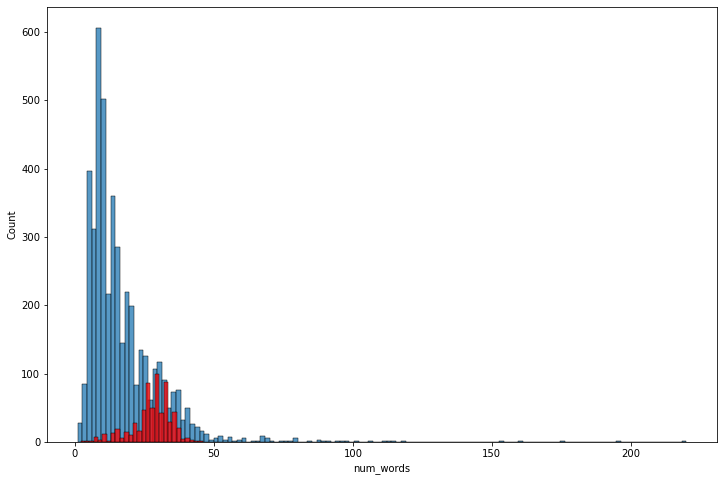

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

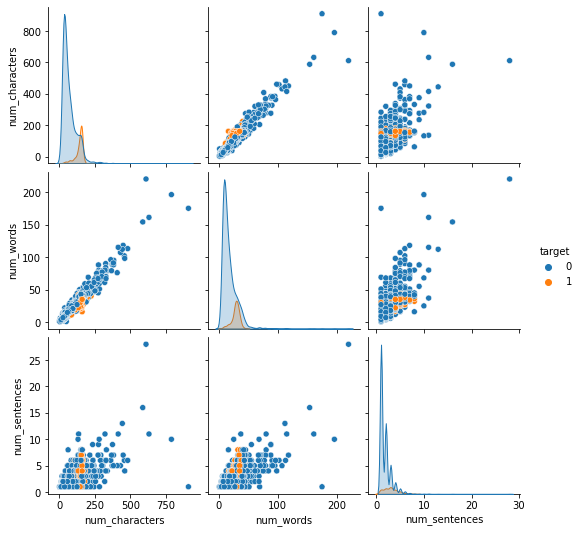

In [39]:
sns.pairplot(df,hue='target') 

In [40]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384655,0.262896,0.284834
num_characters,0.384655,1.000000,0.965757,0.638058
num_words,0.262896,0.965757,1.000000,0.684469
num_sentences,0.284834,0.638058,0.684469,1.000000


<AxesSubplot:>

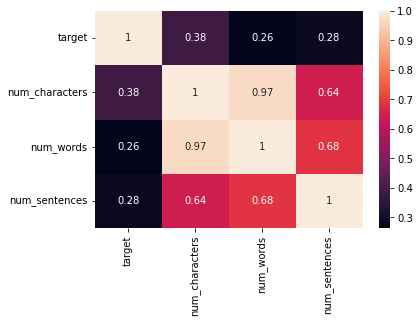

In [41]:
sns.heatmap(df.corr(),annot=True)
# num characters is highly correlated with target so we take num characters only because num char,word and sen is highly correlated with each other

## 3.Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

# Function for Tokenization, Removing special characters, Removing stop words and punctuation, Stemming


In [45]:
#function for Tokenization, Removing special characters, Removing stop words and punctuation, Stemming
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    #after tokenize text is convert to list
    
    y=[]
    for i in text: # Removing special characters
        if i.isalnum(): #alpha numeric
            y.append(i)
            
    text=y[:] # if only text = y, then text is clear when we clear y
    y.clear()
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [47]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5565    2nd time tri 2 contact u pound prize 2 claim e...
5566                                b go esplanad fr home
5567                                    piti mood suggest
5568    guy bitch act like interest buy someth els nex...
5569                                       rofl true name
Name: text, Length: 5167, dtype: object

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

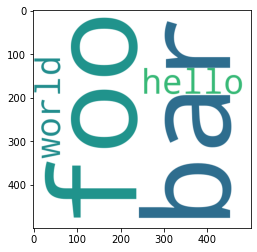

In [51]:
foo=wc.generate("foo bar foo bar hello world")
plt.imshow(foo)

In [52]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
#this line concatinate all row string (which has target 1) on top of space

In [53]:
df[df['target'] == 1]['transformed_text'].str.cat(sep=" ") ## combine all row's string which has target == 1 

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

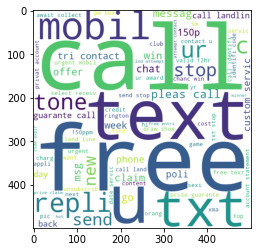

In [55]:
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

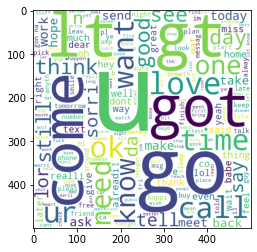

In [57]:
plt.imshow(spam_wc)

In [58]:
#now we find which word is max used
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
df[df['target']==1]['transformed_text'] #series

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5535    want explicit sex 30 sec ring 02073162414 cost...
5538    ask 3mobil 0870 chatlin inclu free min india c...
5545    contract mobil 11 mnth latest motorola nokia e...
5564    remind o2 get pound free call credit detail gr...
5565    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [60]:
df[df['target']==1]['transformed_text'].tolist() #list of string

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [61]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [62]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [63]:
len(spam_corpus)

9939

In [64]:
from collections import Counter
Counter(spam_corpus) #create a dictionary word : how many time that word occure

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [65]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [66]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


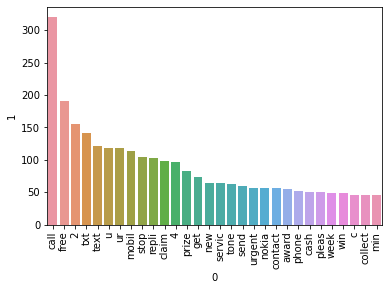

In [67]:
#for spam corpus
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [69]:
len(ham_corpus)

35385

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


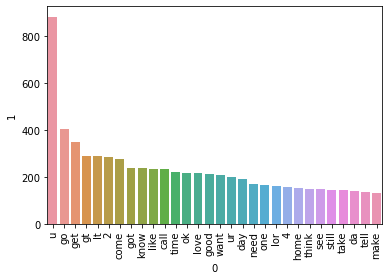

In [70]:
#for ham corpus
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

## Using BOW

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [72]:
x=cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
### step 6 improvement 2.scaling: after scaling i didnt get better result so dont do this step
### after scaling we didn't get better result so dont do this step

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

In [74]:
### step 6 improvement 3.appending the num character column in x

# x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [75]:
x.shape

(5167, 6708)

In [76]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
y=df['target'].values

In [78]:
y.shape

(5167,)

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [84]:
gnb.fit(x_train,y_train)
y_pred1 =gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.879110251450677
0.4975609756097561
[[807 103]
 [ 22 102]]


In [85]:
mnb.fit(x_train,y_train)
y_pred2 =mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.97678916827853
0.9032258064516129
[[898  12]
 [ 12 112]]


In [86]:
bnb.fit(x_train,y_train)
y_pred3 =bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9748549323017408
0.9803921568627451
[[908   2]
 [ 24 100]]


## Using Tfidf

In [87]:
##using Tfidf
tfidf=TfidfVectorizer(max_features=3000) #6.model improvment step
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
x.shape

(5167, 3000)

In [89]:
y=df['target'].values

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)
y_pred1 =gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8752417794970987
0.48756218905472637
[[807 103]
 [ 26  98]]


In [94]:
mnb.fit(x_train,y_train)
y_pred2 =mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.97678916827853
1.0
[[910   0]
 [ 24 100]]


In [95]:
bnb.fit(x_train,y_train)
y_pred3 =bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9758220502901354
0.9626168224299065
[[906   4]
 [ 21 103]]


# TFIDF --> mnb gives best result

In [96]:
#making general function for train model on differet algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
clfs = {
'SVC' : svc, ## name : model
'KN' : knc, 
'NB': mnb, 
'DT': dtc, 
'LR': lrc, 
'RF': rfc, 
'AdaBoost': abc, 
'BgC': bc, 
'ETC': etc,
'GBDT':gbdt,
'xgb':xgb
    }

In [99]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9803921568627451)

In [101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9158607350096711
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.7525773195876289
For  LR
Accuracy -  0.9516441005802708
Precision -  0.9302325581395349
For  RF
Accuracy -  0.9729206963249516
Precision -  1.0
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9659090909090909
For  BgC
Accuracy -  0.9516441005802708
Precision -  0.8363636363636363
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9722222222222222
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9024390243902439
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9223300970873787


In [102]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [103]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.915861,1.000000
2,NB,0.976789,1.000000
5,RF,0.972921,1.000000
0,SVC,0.974855,0.980392
8,ETC,0.978723,0.972222
6,AdaBoost,0.959381,0.965909
4,LR,0.951644,0.930233
10,xgb,0.964217,0.922330
9,GBDT,0.943907,0.902439
7,BgC,0.951644,0.836364


In [104]:
performance_df1=pd.melt(performance_df, id_vars ='Algorithm')

In [105]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.915861
1,NB,Accuracy,0.976789
2,RF,Accuracy,0.972921
3,SVC,Accuracy,0.974855
4,ETC,Accuracy,0.978723
5,AdaBoost,Accuracy,0.959381
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.964217
8,GBDT,Accuracy,0.943907
9,BgC,Accuracy,0.951644


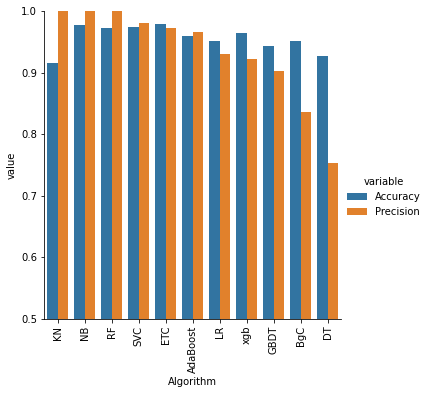

In [106]:
sns.catplot(x ='Algorithm' , y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

# 6.Model Improvment


In [107]:
#1.Change the max features parameter of tfidf
#2.scaling of input
#3.appending the num character column in x
#4.voting Classifier  --> combination of best performing algo
#5.Applying stacking  -->giving weight of best performing algo

# Voting Classifier --> combination of best performing algo

In [108]:
# Voting Classifier --> combination of best performing algo
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [109]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [110]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [111]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 1.0


# Applying stacking -->giving weights of best performing algo

In [112]:
# Applying stacking  -->giving weights of best performing algo
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9646017699115044


In [116]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))